In [145]:
import pandas as pd # dataset load
from sklearn.datasets import load_iris
# 계층적 군집 model
from scipy.cluster.hierarchy import linkage, dendrogram


import pandas as pd # dataset load
from sklearn.cluster import KMeans # model
import matplotlib.pyplot as plt # 시각화

- 군집분석이란?
서로 유사한 정도에 따라 다수의 객체를 군집으로 나누는 작업 또는 이에 기반한 분석을 의미한다.

- 유사도가 높은 데이터끼리 그룹화 (대표적으로 유클리드 거리식 이용)

- 계층형 클러스터링과 비계층형 클러스터링으로 분류

- 주요 알고리즘 : k-means, hierarchical

 

> 군집분석의 특징
- 종속변수(y변수)가 없는 데이터 마이닝 기법 (비지도 학습)

- 유클리드 거리 기반 유사 객체 묶음 (유사성 = 유클리드 거리)

- 전체적인 데이터 구조를 파악하는데 이용

- 분석결과에 대한 가설 검정 없음 (타당성 검증 방법 없음)

- 계층적 군집분석(탐색적), 비계층적 군집분석(확인적)

- 고객 DB -> 알고리즘 적용 -> 패턴 추출(rule) -> 근거리 모형으로 군집 형성

- 척도 : 등간, 비율척도   => 명목척도를 만듦

-1) 유클리드 거리
- 두 점 사이의 거리를 계산하는 방법

- 이 거리를 이용하여 유클리드 공간 정의
2) 계층적 군집분석 (hierarchical)
- 유클리드 거리를 이용한 군집분석 방법

- 계층적으로 군집 결과 도출

- 탐색적 군집분석

- 계층적 군집분석의 결과

    => 덴드로그램 (Dendrogram) : 표본들이 군을 형성하는 과정을 나타내는 나무 형식의 그림

- 군집 수는 사용자가 정할 수 있음 (2집단, 3집단, ... 등)


- 군집화 방식 

① 단일기준결합방식 : 각 군집에서 중심으로부터 거리가 가까운 것 1개씩 비교하여 가장 가까운 것끼리 군집화

② 완전기준결합방식 : 각 군집에서 중심으로부터 가장 먼 대상끼리 비교하여 가장 가까운 것끼리 군집화

③ 평균기준결합방식 : 한 군집 안에 속해 있는 모든 대상과 다른 군집에 속해있는 모든 대상의 쌍 집합에 대한 거리를 평균 계산하여 가장 가까운 것끼리 군집화

-3) 비계층적 군집분석 (k-Means)
- 계층적 군집분석보다 속도 빠름

- 군집의 수를 알고 있는 경우 이용

- k는 미리 정하는 군집 수

- 확인적 군집분석

- 계층적 군집화의 결과에 의거하여 군집 수 결정

- 변수보다 관측대상 군집화에 많이 이용

- 군집의 중심(Cluster Center)은 사용자가 정함

 

> k-평균(k-Menas) 군집분석 알고리즘

① k값을 초기값으로, k개의 centroid 선정 (랜덤)

② 각 데이터 포인터를 가장 가까운 centroid에 할당

③ centroid에 할당된 모든 데이터 포인트의 중심 위치 계산 (centroid 재조정)

④ 재조정된 centroid와 가장 가까운 데이터 포인트 할당

⑤ centroid 재조정이 발생되지 않을 때까지 ③, ④단계 반복

-<실습한 내용>

1. hierachical (hierarchy)

2. kMeans 실습(1)

3. kMeans 실습(2)

-1. hierachical (hierarchy)
"""
계층적 군집분석
 - 유클리드 거리계산식 이용
 - 상향식(Bottom-up)으로 군집을 형성
"""

In [146]:
#1.dataset load
iris = pd.read_csv("../data/iris.csv")
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [147]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [148]:
cols = list(iris.columns)
iris_x = iris[cols[:4]]
iris_x.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [149]:
iris['Species'].value_counts() # 'Species' : y변수
#'''
#versicolor    50
#virginica     50
#setosa        50
#'''

versicolor    50
setosa        50
virginica     50
Name: Species, dtype: int64

In [150]:
#iris["labels"]

In [151]:
# 2. y변수 수치화
X, y = load_iris(return_X_y=True)

# 사이킷런 라이브러리에서 제공하는 데이터셋을 불러오면 범주값을 숫자로 받을 수 있음
y  # 0,1,2로 구성됨

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [152]:
labels = pd.DataFrame(y, columns = ['labels'])

In [153]:
# df = df + df
irisDF = pd.concat([iris_x, labels], axis = 1)
irisDF.head()
irisDF.tail()  # x변수들과 수치화된 y변수(labels)로 데이터프레임 만들어진 것을 확인

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,labels
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [154]:
# 3. 계층적 군집분석 model
clusters = linkage(y=irisDF, method='complete', metric='euclidean')
clusters
clusters.shape # (149, 4)
# '''
# 연결방식 
# 1. 단순연결방식(single)
# 2. 완전연결방식(complete)
# 3. 평균연결방식(average)
# '''

(149, 4)

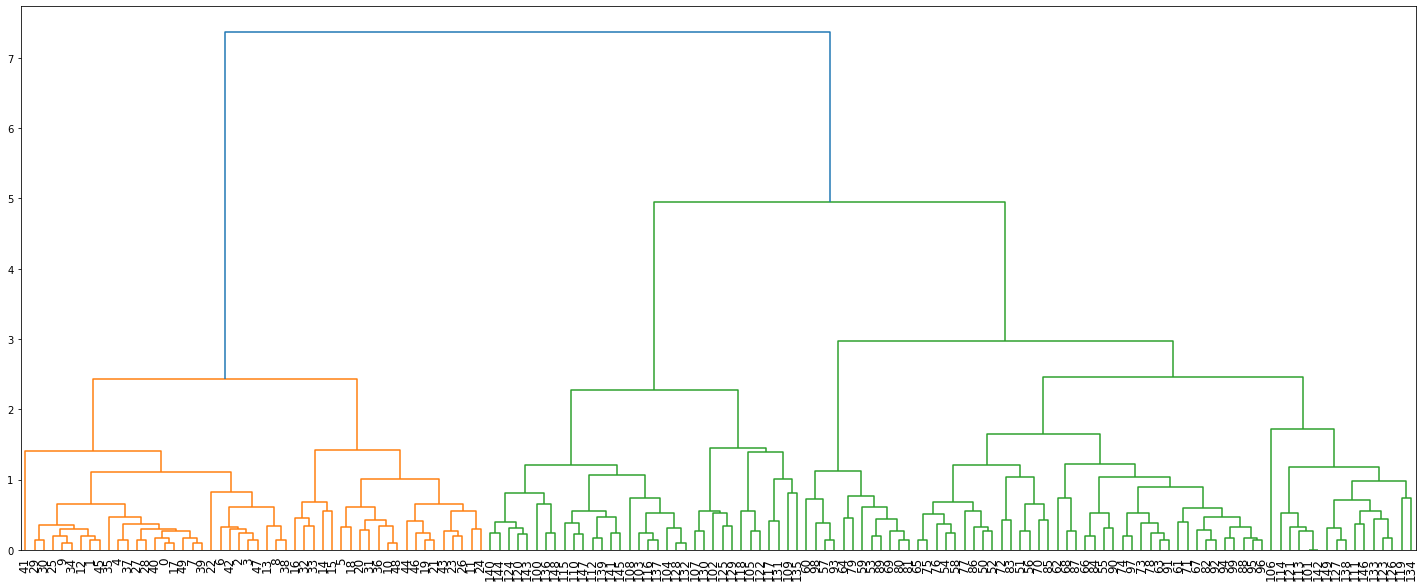

In [155]:
# 4. 덴드로그램 시각화 : 군집수 결정
import matplotlib.pyplot as plt
plt.figure( figsize = (25, 10) )
dendrogram(clusters, leaf_rotation=90, leaf_font_size=12,)
# leaf_rotation=90 : 글자 각도
# leaf_font_size=20 : 글자 사이즈
plt.show() 

In [156]:

# 5. 클러스터링(군집) 결과
from scipy.cluster.hierarchy import fcluster # 지정한 클러스터 자르기

In [157]:
cut_tree = fcluster(clusters, t=3, criterion='distance')
cut_tree # prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [158]:
labels = irisDF['labels'] # 정답

df = pd.DataFrame({'pred':cut_tree, 'labels':labels})

con_mat = pd.crosstab(df['pred'], df['labels'])
con_mat

labels,0,1,2
pred,,,
1,50,0,0
2,0,0,34
3,0,50,16


In [159]:
# irisDF에 군집 예측치 추가
irisDF.head()
irisDF['cluster'] = cut_tree
irisDF.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,labels,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


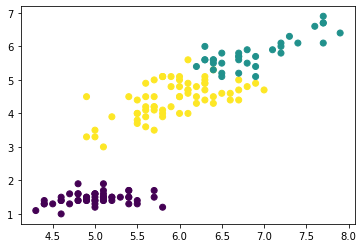

In [160]:
# 클러스터 단위 산점도 시각화
plt.scatter(x=irisDF['Sepal.Length'], y=irisDF['Petal.Length'], c=irisDF['cluster'])

In [161]:
# 클러스터 빈도수
irisDF['cluster'].value_counts()


3    66
1    50
2    34
Name: cluster, dtype: int64

In [162]:
# 각 클러스터별 통계(평균)
cluster_g = irisDF.groupby('cluster')
cluster_g.mean()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,labels
cluster,,,,,
1,5.006000,3.428000,1.462000,0.246000,0.000000
2,6.888235,3.100000,5.805882,2.123529,2.000000
3,5.939394,2.754545,4.442424,1.445455,1.242424


In [163]:
iris1 = pd.read_csv("data/iris.csv")
iris1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [164]:
irisDF = iris[['Sepal.Length', 'Petal.Length']]  # 두 개의 칼럼만 이용
irisDF.head()

,Sepal.Length,Petal.Length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [165]:
# 2. 비계층적 군집 분석 model
model = KMeans(n_clusters=3, random_state=0, algorithm='auto')
# n_clusters=3 : 군집의 개수 (k) (이미 알고 있음)
# random_state=0 : seed 역할 (모델을 일정하게 생성 = 랜덤X)
model.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [166]:
# 3. 클러스터링(군집) 결과
pred = model.predict(irisDF)
pred
len(pred) # 150 (관측치 개수만큼 예측치 생성됨)

150

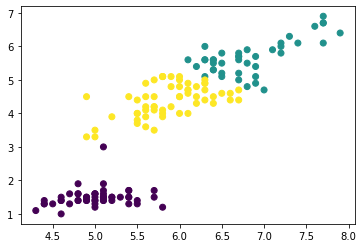

In [167]:

# 4. 군집결과 시각화
plt.scatter(x=irisDF['Sepal.Length'], y=irisDF['Petal.Length'], c=pred)

In [168]:
# 군집별 중앙값
centers = model.cluster_centers_
centers

array([[5.00784314, 1.49215686],
       [6.83902439, 5.67804878],
       [5.87413793, 4.39310345]])

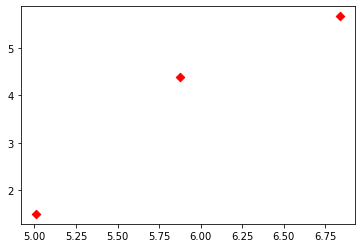

In [169]:
# 군집별 중앙값 시각화
plt.scatter(x=centers[:,0], y=centers[:,1], marker='D', c='r')
# marker='D', c='r' : 마커 모양은 Diamond, 색깔은 red
plt.show()

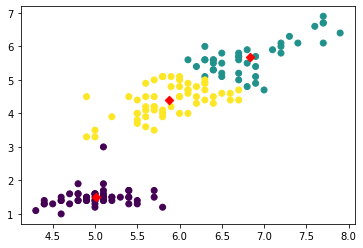

In [170]:
# 군집결과와 중앙값 함께 시각화

plt.scatter(x=irisDF['Sepal.Length'], y=irisDF['Petal.Length'], c=pred) 

plt.scatter(x=centers[:,0], y=centers[:,1], marker='D', c='r')
plt.show() 

# 블럭 실행

In [171]:
#3. kMeans 실습(2)
#"""
#kMeans 알고리즘
# - testSet.txt 파일 데이터셋 이용
#"""

In [172]:
import pandas as pd
from sklearn.cluster import KMeans # model
import matplotlib.pyplot as plt # 시각화
import numpy as np # dataset

In [173]:
# dataset 생성 함수
def loadDataSet(fileName) :
    rows = [] # 전체 행(80개)
    f = open(fileName, mode='r')
    
    lines = f.readlines()  # 줄단위 전체 행 읽기
    
    for row in lines :   # 줄 단위 읽기 : 1.658985 4.285136
        line = row.split('\t')  # '1.658985' '4.285136'
        row = []  # 1줄 행
        for l in line :
            row.append( float(l) )  # ['1.658985', '4.285136']
    
        rows.append(row)  # [['1.658985', '4.285136'], .... ]
    
    return np.array(rows)  # 2차원(80, 2) 행렬 구조로 return

In [174]:
# 1. 함수 호출
dataset = loadDataSet("data/testSet.txt")
dataset.shape # (80, 2)
type(dataset) # numpy.ndarray

numpy.ndarray

In [175]:
dataset
dataset[:10, :] # 10행

array([[ 1.658985,  4.285136],
       [-3.453687,  3.424321],
       [ 4.838138, -1.151539],
       [-5.379713, -3.362104],
       [ 0.972564,  2.924086],
       [-3.567919,  1.531611],
       [ 0.450614, -3.302219],
       [-3.487105, -1.724432],
       [ 2.668759,  1.594842],
       [-3.156485,  3.191137]])

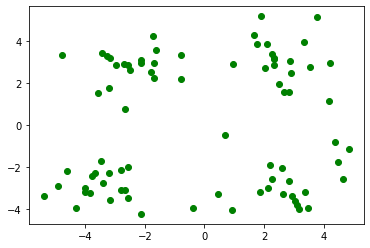

In [176]:
plt.plot(dataset[:,0], dataset[:,1], 'go')   # 0번째 열은 x값, 1번째 열은 y값,  'go' : green 색깔의 o 모양 마커
plt.show()

In [177]:
# 2. df 생성
dataDF = pd.DataFrame(dataset, columns = ['x', 'y'])
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       80 non-null     float64
 1   y       80 non-null     float64
dtypes: float64(2)
memory usage: 1.4 KB


In [178]:
# 3. kMeans model
model = KMeans(n_clusters=4, algorithm='auto') # k = 4
model.fit(dataDF)

KMeans(n_clusters=4)

In [179]:
# kMeans 예측치
pred = model.predict(dataDF)
pred # 0~3, 총 4개의 도메인으로 군집 형성

#plt.scatter(x=dataDF['x'], y=dataDF['y'], c=pred)

array([2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3,
       0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1,
       2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3,
       0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1])

In [180]:
# 각 군집의 중앙값
centers = model.cluster_centers_
centers

array([[ 2.80293085, -2.7315146 ],
       [-3.38237045, -2.9473363 ],
       [ 2.6265299 ,  3.10868015],
       [-2.46154315,  2.78737555]])

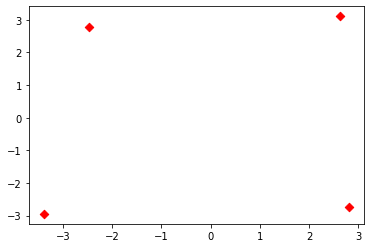

In [181]:
plt.scatter(x=centers[:,0], y=centers[:,1], marker='D', c='r')
plt.show()

# 예측치부터 블럭실행

In [182]:
# 4. 원형 데이터에 군집 예측치 추가
dataDF['cluster'] = pred
dataDF.head()

,x,y,cluster
0,1.658985,4.285136,2
1,-3.453687,3.424321,3
2,4.838138,-1.151539,0
3,-5.379713,-3.362104,1
4,0.972564,2.924086,2
